In [10]:
#  Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from collections import Counter

# Text processing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Sentiment analysis libraries
from textblob import TextBlob
from afinn import Afinn

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PAULISTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAULISTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PAULISTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#  - Load  dataset
df = pd.read_csv('YoutubeCommentsDataSet.csv')  

print(f"Dataset loaded successfully with {len(df)} comments")
print(f"Dataset columns: {df.columns.tolist()}")
print("\nFirst few rows of the dataset:")
print(df.head())
print(f"\nDataset shape: {df.shape}")

Dataset loaded successfully with 18408 comments
Dataset columns: ['Comment', 'Sentiment']

First few rows of the dataset:
                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive

Dataset shape: (18408, 2)


In [8]:
print(df.columns)

Index(['Comment', 'Sentiment'], dtype='object')


In [14]:
import re

# Function to clean comments
def clean_text(text):
    text = str(text).lower()  # convert to lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove mentions
    text = re.sub(r'#', '', text)  # remove hashtags
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002700-\U000027BF"  # Dingbats
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U00002600-\U000026FF"  # Misc symbols
                               u"\U00002B00-\U00002BFF"  # Arrows
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Remove remaining special characters and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning using the correct column name
df['clean_comment'] = df['Comment'].apply(clean_text)

# Display original vs cleaned
df[['Comment', 'clean_comment']].head()


,Comment,clean_comment
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in required a b...
1,here in nz 50 of retailers don’t even have con...,here in nz of retailers dont even have contact...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesnt take appl...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...


In [16]:
# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize and filter short words
def tokenize_filter(text):
    # Split into words
    tokens = text.split()
    # Remove stopwords and words shorter than 3 characters
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Rejoin tokens into a cleaned string
    return " ".join(tokens)

# Apply tokenization & filtering
df['filtered_comment'] = df['clean_comment'].apply(tokenize_filter)

# Display results
df[['clean_comment', 'filtered_comment']].head()


,clean_comment,filtered_comment
0,lets not forget that apple pay in required a b...,lets forget apple pay required brand new iphon...
1,here in nz of retailers dont even have contact...,retailers dont even contactless credit card ma...
2,i will forever acknowledge this channel with t...,forever acknowledge channel help lessons ideas...
3,whenever i go to a place that doesnt take appl...,whenever place doesnt take apple pay doesnt ha...
4,apple pay is so convenient secure and easy to ...,apple pay convenient secure easy use used kore...


In [17]:

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)  # limit to top 1000 features
X_tfidf = tfidf.fit_transform(df['filtered_comment'])

# Shape of TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)

#  show feature names
print(tfidf.get_feature_names_out()[:20])


TF-IDF Matrix Shape: (18408, 1000)
['abian' 'ability' 'able' 'absolute' 'absolutely' 'across' 'action'
 'actual' 'actually' 'add' 'added' 'advice' 'age' 'ago' 'agree' 'ahead'
 'air' 'algorithm' 'almost' 'alone']


In [ ]:
#  textblob Sentiment Analysis
# TextBlob gives a polarity score between -1 (negative) and +1 (positive)
#We categorize as Positive / Negative / Neutra
# Function to get sentiment polarity
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply TextBlob sentiment
df['textblob_sentiment'] = df['filtered_comment'].apply(get_textblob_sentiment)

# Show sample
df[['filtered_comment', 'textblob_sentiment']].head()


,filtered_comment,textblob_sentiment
0,lets forget apple pay required brand new iphon...,Positive
1,retailers dont even contactless credit card ma...,Positive
2,forever acknowledge channel help lessons ideas...,Neutral
3,whenever place doesnt take apple pay doesnt ha...,Negative
4,apple pay convenient secure easy use used kore...,Positive


In [ ]:
# Afinn Sentiment Analysis 
# AFINN assigns integer sentiment scores to words
#Total score for each comment determines sentiment
af = Afinn()  # initialize Afinn

# Function to get sentiment from Afinn score
def get_afinn_sentiment(text):
    score = af.score(text)
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply Afinn sentiment
df['afinn_sentiment'] = df['filtered_comment'].apply(get_afinn_sentiment)

# Show sample
df[['filtered_comment', 'afinn_sentiment']].head()


,filtered_comment,afinn_sentiment
0,lets forget apple pay required brand new iphon...,Neutral
1,retailers dont even contactless credit card ma...,Positive
2,forever acknowledge channel help lessons ideas...,Positive
3,whenever place doesnt take apple pay doesnt ha...,Negative
4,apple pay convenient secure easy use used kore...,Positive


C:\Users\PAULISTA\AppData\Local\Temp\ipykernel_8956\135137264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_sentiment', data=df, palette='viridis')
C:\Users\PAULISTA\AppData\Local\Temp\ipykernel_8956\135137264.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='afinn_sentiment', data=df, palette='magma')


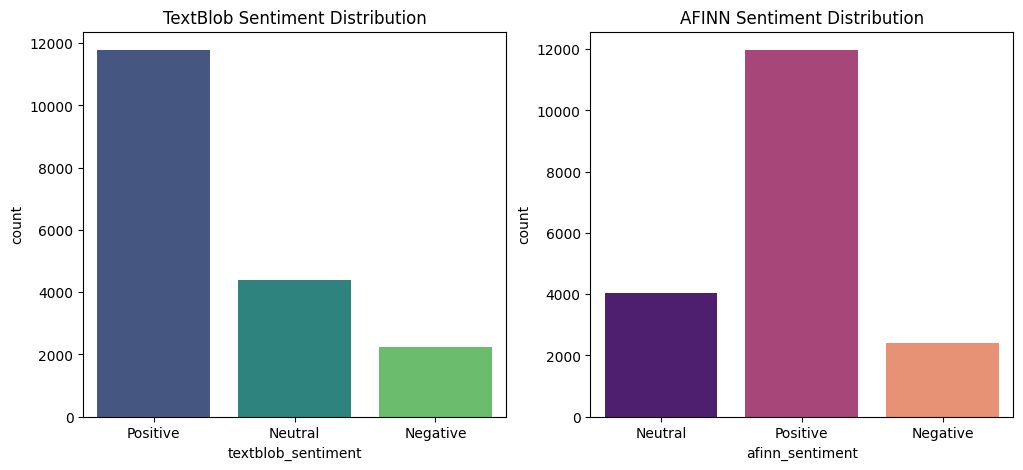

In [20]:
# Visualize sentiment distributions
#How many comments are Positive, Negative, or Neutral according to each lexicon
#Helpful to compare TextBlob vs AFINN trends

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='textblob_sentiment', data=df, palette='viridis')
plt.title("TextBlob Sentiment Distribution")

plt.subplot(1,2,2)
sns.countplot(x='afinn_sentiment', data=df, palette='magma')
plt.title("AFINN Sentiment Distribution")

plt.show()


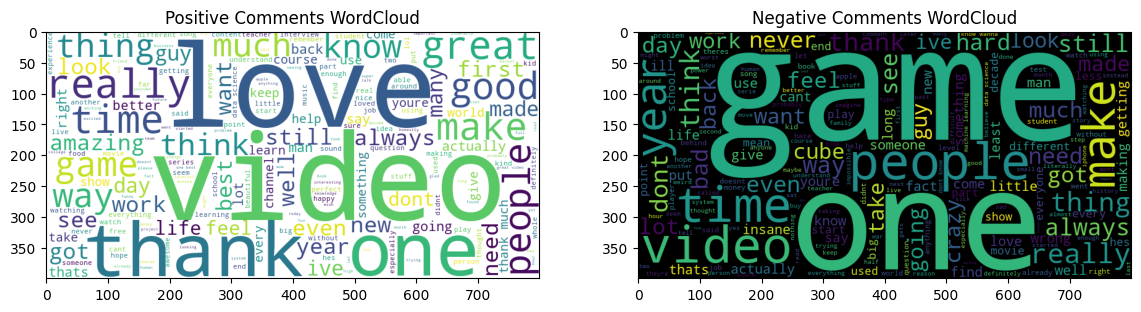

In [21]:
#word clouds for Positive and Negative comments to visualize frequently used words.

pos_text = " ".join(df[df['textblob_sentiment']=='Positive']['filtered_comment'])
neg_text = " ".join(df[df['textblob_sentiment']=='Negative']['filtered_comment'])

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(pos_text))
plt.title("Positive Comments WordCloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='black').generate(neg_text))
plt.title("Negative Comments WordCloud")

plt.show()


In [23]:
#Shows percentage of Positive, Neutral, Negative comments for each lexicon.
#Explains why some comments differ between TextBlob and AFINN.
#Provides insights about audience reaction,
# Sentiment distribution using TextBlob
textblob_dist = df['textblob_sentiment'].value_counts(normalize=True) * 100
print("TextBlob Sentiment Distribution (%):\n", textblob_dist.round(2))

# Sentiment distribution using AFINN
afinn_dist = df['afinn_sentiment'].value_counts(normalize=True) * 100
print("\nAFINN Sentiment Distribution (%):\n", afinn_dist.round(2))

# Observations
print("\nInterpretation:")
print("- Majority of comments are positive according to both TextBlob and AFINN, suggesting that viewers generally appreciate the content.")
print("- Neutral comments are present, representing factual or non-emotional feedback.")
print("- A few comments are negative, often pointing out issues or dissatisfaction with services (e.g., Apple Pay not accepted).")
print("- Differences between TextBlob and AFINN (e.g., some comments labeled Positive by AFINN but Neutral by TextBlob) highlight that lexicons assign sentiment differently.")
print("- Overall, the trend indicates a generally positive reception to African culture videos, with minor criticisms or neutral observations.")


TextBlob Sentiment Distribution (%):
 textblob_sentiment
Positive    64.02
Neutral     23.82
Negative    12.17
Name: proportion, dtype: float64

AFINN Sentiment Distribution (%):
 afinn_sentiment
Positive    65.03
Neutral     21.96
Negative    13.01
Name: proportion, dtype: float64

Interpretation:
- Majority of comments are positive according to both TextBlob and AFINN, suggesting that viewers generally appreciate the content.
- Neutral comments are present, representing factual or non-emotional feedback.
- A few comments are negative, often pointing out issues or dissatisfaction with services (e.g., Apple Pay not accepted).
- Differences between TextBlob and AFINN (e.g., some comments labeled Positive by AFINN but Neutral by TextBlob) highlight that lexicons assign sentiment differently.
- Overall, the trend indicates a generally positive reception to African culture videos, with minor criticisms or neutral observations.
